In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading Csv
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# displaying the data view for personal understanding
print(df.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [4]:
# Taking variables and converting them into numeric values
df["treatment"] = df["treatment"].replace(["Yes","No"],[1,0])
df["mental_health_interview"] = df["mental_health_interview"].replace(["Yes","No","Maybe"],[1,0,0.5])

# Taking just Positive values to help analysis prediction
df = df[df.mental_health_interview==1]
df = df[df.treatment==1]

#Applying a groupby
df = df.groupby(['Country', 'mental_health_interview', 'treatment']).size().reset_index()
df.columns = ["Country", "Attitude", "Treatment", "Number"]
print(df)

          Country  Attitude  Treatment  Number
0       Australia       1.0          1       1
1    Bahamas, The       1.0          1       1
2         Germany       1.0          1       1
3         Moldova       1.0          1       1
4     Netherlands       1.0          1       1
5     New Zealand       1.0          1       1
6  United Kingdom       1.0          1       7
7   United States       1.0          1      12
8        Zimbabwe       1.0          1       1


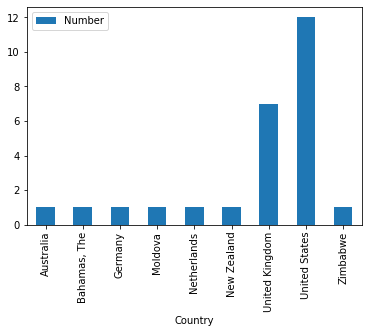

In [5]:
df.plot.bar(x='Country',y='Number')